# Terry Traffic Stops Data Analysis

## Project Overview

This project analyzes **Terry Stop** records from Seattle Police Department (SPD), spanning 2015-2025. Terry Stops are brief investigative encounters where police temporarily detain individuals based on reasonable suspicion of criminal activity. This analysis uses machine learning and statistical methods to:

1. **Understand patterns** in arrest outcomes across different demographics and contexts
2. **Build predictive models** to identify factors most strongly associated with arrests
3. **Detect potential disparities** in how policing decisions vary by race, age, and other characteristics
4. **Inform policy discussions** on equity and accountability in law enforcement

### Dataset Characteristics
- **Total Records**: 65,884 police stops
- **Time Period**: 2015-2025
- **Target Variable**: Arrest Flag [Binary: Yes/No]
- **Class Distribution**: 88.5% non-arrests, 11.5% arrests 
- **Features**: Subject demographics, officer characteristics, weapon presence, call types, frisk decisions

---

## Objectives

**1. Predictive Modeling**
- Train multiple machine learning algorithms to predict arrest outcomes
- Evaluate models using appropriate metrics for imbalanced classification
- Identify the best-performing model for production use

**2. Feature Importance Analysis**
- Determine which factors most strongly influence arrest decisions
- Distinguish between objective factors (weapons, call type) and subjective/demographic factors (race, age)
- Understand if officer characteristics affect arrest propensity

**3. Statistical Investigation**
- Conduct hypothesis testing on racial and demographic disparities
- Quantify the relationship between frisk decisions and arrests
- Compare arrest rates across meaningful demographic groups

**4. Model Interpretability**
- Visualize model performance across multiple dimensions
- Understand prediction confidence and calibration
- Identify edge cases where models struggle

**5. Data Quality Assessment**
- Clean and standardize messy police data
- Handle missing values appropriately
- Engineer meaningful features from raw variables

---

## Key Questions Being Answered

1. **Can we predict arrests?** How well do demographics and context predict arrest outcomes?
2. **What matters most?** Which factors have the strongest influence on arrest decisions?
3. **Are there disparities?** Do arrest rates differ significantly by race, age, or other protected characteristics?
4. **Is frisk a predictor or a cause?** Does frisk strongly correlate with arrests, and what does it indicate?
5. **Which model works best?** For different use cases (maximizing accuracy vs. catching arrests), which algorithm performs best?

---

## Important Caveats

 **Correlation ≠ Causation**: This analysis identifies patterns, not causal relationships. Observed disparities could result from:
- Different stop rates across neighborhoods
- Differences in actual crime patterns
- Officer assignment patterns
- Legitimate differences in case characteristics

 **Data Limitations**: Police data reflects enforcement decisions, not actual crime. Underrepresentation or overrepresentation in stops may reflect policing patterns rather than actual criminality.

 **Ethical Considerations**: Predictive models of arrests perpetuate historical patterns in the training data. A model that accurately predicts past arrests may simply be learning past biases.


In [3]:
# import libraries
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [4]:
# loading dataset
df = pd.read_csv("Terry_Stops_20251226.csv")
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Occurred Date
0,36 - 45,7727706299,20250000063255,63109655222,Field Contact,-,8974,1997,Female,White,...,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,NORTH PCT 2ND W - BOY (JOHN) - PLATOON 1,N,N,North,U,U2,2025-03-08T17:58:00
1,46 - 55,7746702884,20210000151070,25601408632,Arrest,-,8696,1996,Male,White,...,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,WARRANT SERVICES - MISDEMEANOR,ONVIEW,NORTH PCT 3RD W - B/N RELIEF,Y,N,North,N,N2,2021-06-18T00:48:00
2,46 - 55,7729078044,20230000235837,51923259552,Field Contact,-,4494,1961,Male,White,...,DISTURBANCE,MISCHIEF OR NUISANCE - GENERAL,911,CRG - SQUAD 81D,N,Y,Southwest,W,W1,2023-08-16T20:31:00
3,1 - 17,-1,20170000317010,301638,Arrest,NaN,7773,1978,Male,White,...,OBS - FIGHT - IP - PHYSICAL (NO WEAPONS),"ASSAULTS, OTHER",911,NORTH PCT 3RD W - B/N RELIEF,N,N,North,L,L3,2017-08-27T03:18:00
4,-,31629429379,20220000039527,31629401025,Field Contact,Knife/Cutting/Stabbing Instrument,6885,1976,Male,Asian,...,DISTURBANCE,SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,WEST PCT 2ND W - SPECIAL BEATS,N,Y,West,M,M2,2022-02-15T17:42:00


In [5]:
# filling missing values 
df['Weapon Type'] = df['Weapon Type'].fillna('No Weapon')


In [6]:
# filling missing values 
df['Officer Squad'] = df['Officer Squad'].fillna(
    df['Officer Squad'].mode()[0]
)


In [7]:
from IPython.display import display

display(df.head())

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Occurred Date
0,36 - 45,7727706299,20250000063255,63109655222,Field Contact,-,8974,1997,Female,White,...,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,NORTH PCT 2ND W - BOY (JOHN) - PLATOON 1,N,N,North,U,U2,2025-03-08T17:58:00
1,46 - 55,7746702884,20210000151070,25601408632,Arrest,-,8696,1996,Male,White,...,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,WARRANT SERVICES - MISDEMEANOR,ONVIEW,NORTH PCT 3RD W - B/N RELIEF,Y,N,North,N,N2,2021-06-18T00:48:00
2,46 - 55,7729078044,20230000235837,51923259552,Field Contact,-,4494,1961,Male,White,...,DISTURBANCE,MISCHIEF OR NUISANCE - GENERAL,911,CRG - SQUAD 81D,N,Y,Southwest,W,W1,2023-08-16T20:31:00
3,1 - 17,-1,20170000317010,301638,Arrest,No Weapon,7773,1978,Male,White,...,OBS - FIGHT - IP - PHYSICAL (NO WEAPONS),"ASSAULTS, OTHER",911,NORTH PCT 3RD W - B/N RELIEF,N,N,North,L,L3,2017-08-27T03:18:00
4,-,31629429379,20220000039527,31629401025,Field Contact,Knife/Cutting/Stabbing Instrument,6885,1976,Male,Asian,...,DISTURBANCE,SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,WEST PCT 2ND W - SPECIAL BEATS,N,Y,West,M,M2,2022-02-15T17:42:00


In [8]:
print('Rows, cols:', df.shape)

Rows, cols: (65894, 23)


In [9]:
print('\nColumns:', list(df.columns))


Columns: ['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID', 'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB', 'Officer Gender', 'Officer Race', 'Subject Perceived Race', 'Subject Perceived Gender', 'Reported Date', 'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad', 'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat', 'Occurred Date']


In [10]:
print(df['Arrest Flag'].value_counts(dropna=False))

Arrest Flag
N    58338
Y     7556
Name: count, dtype: int64


In [11]:
print(df['Frisk Flag'].value_counts(dropna=False))

Frisk Flag
N    49348
Y    16068
-      478
Name: count, dtype: int64


In [12]:
# Data cleaning function
def clean_stops(df):
    df = df.copy()
    # Normalizing column names
    df.columns = [c.strip() for c in df.columns]
    
    # Replacing obvious placeholders with NaN
    df.replace(['-', 'None', ''], pd.NA, inplace=True)
    
    # Changing dates to datetime
    for col in ['Reported Date', 'Occurred Date']:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
            
    # Dropping duplicates
    df.drop_duplicates(inplace=True)
    
    # Numeric conversion
    if 'Officer YOB' in df.columns:
        df['Officer YOB'] = pd.to_numeric(df['Officer YOB'], errors='coerce')
        
    # Creating officer_age
    if 'Officer YOB' in df.columns and 'Occurred Date' in df.columns:
        df['officer_age_at_stop'] = df['Occurred Date'].dt.year - df['Officer YOB']
        
    # Standardizing flag columns to binary
    for flag in ['Arrest Flag', 'Frisk Flag']:
        if flag in df.columns:
            df[flag] = df[flag].map({'Y':1, 'N':0}).astype('Int64')
            
    # Cleaning Weapon Type: grouping rare weapons and missing values
    if 'Weapon Type' in df.columns:
        df['Weapon Type'] = df['Weapon Type'].fillna('None')
        
        # Collapsing into broader categories
        weapon_mapping = {
            'None': 'None',
            'Knife/Cutting/Stabbing Instrument': 'Knife',
            'Firearm Other': 'Firearm',
            'Club, Blackjack, Brass Knuckles': 'Blunt Object',
            'Lethal Cutting Instrument': 'Blade'
        }
        df['Weapon Type'] = df['Weapon Type'].map(lambda x: weapon_mapping.get(x, 'Other'))
        
    # Cleaning Officer Squad: standardize and group
    if 'Officer Squad' in df.columns:
        df['Officer Squad'] = df['Officer Squad'].fillna('Unknown')
        # Extract squad type (before first '-' or first digit)
        df['Officer Squad Type'] = df['Officer Squad'].str.extract(r'([A-Z]+)')[0].fillna('Unknown')
        
    # Filling remaining categorical NaNs
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    for c in cat_cols:
        df[c] = df[c].fillna('Unknown')
    return df


In [13]:
# Creating cleaned dataframe 
df_clean = clean_stops(df)
display(df_clean.head())

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Occurred Date,officer_age_at_stop,Officer Squad Type
0,36 - 45,7727706299,20250000063255,63109655222,Field Contact,None,8974,1997,Female,White,...,ONVIEW,NORTH PCT 2ND W - BOY (JOHN) - PLATOON 1,0,0,North,U,U2,2025-03-08 17:58:00,28,NORTH
1,46 - 55,7746702884,20210000151070,25601408632,Arrest,None,8696,1996,Male,White,...,ONVIEW,NORTH PCT 3RD W - B/N RELIEF,1,0,North,N,N2,2021-06-18 00:48:00,25,NORTH
2,46 - 55,7729078044,20230000235837,51923259552,Field Contact,None,4494,1961,Male,White,...,911,CRG - SQUAD 81D,0,1,Southwest,W,W1,2023-08-16 20:31:00,62,CRG
3,1 - 17,-1,20170000317010,301638,Arrest,Other,7773,1978,Male,White,...,911,NORTH PCT 3RD W - B/N RELIEF,0,0,North,L,L3,2017-08-27 03:18:00,39,NORTH
4,Unknown,31629429379,20220000039527,31629401025,Field Contact,Knife,6885,1976,Male,Asian,...,ONVIEW,WEST PCT 2ND W - SPECIAL BEATS,0,1,West,M,M2,2022-02-15 17:42:00,46,WEST


In [14]:
# EDA: distributions and arrest rates by race/gender/age group
sns.set(style='whitegrid')

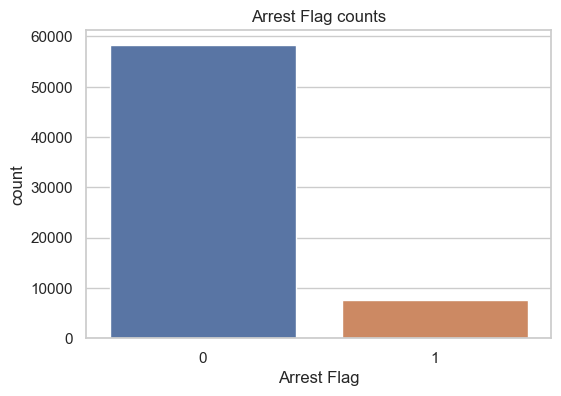

In [15]:
# Arrest counts
plt.figure(figsize=(6,4))
sns.countplot(x='Arrest Flag', data=df_clean)
plt.title('Arrest Flag counts')
plt.show()


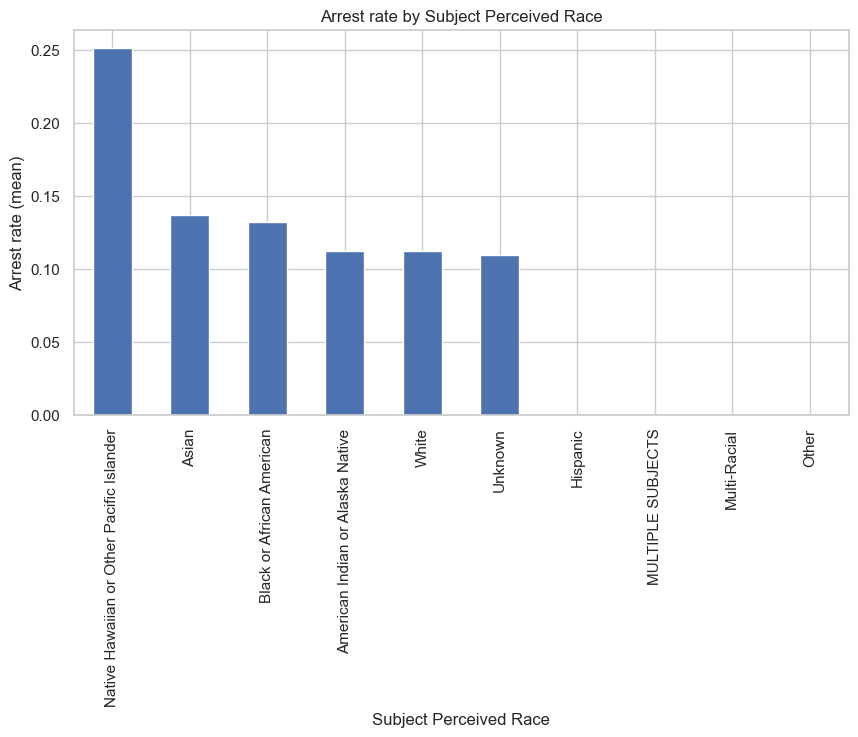

In [16]:
# Arrest rate by Subject Perceived Race
race_tbl = df_clean.groupby('Subject Perceived Race')['Arrest Flag'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
race_tbl.plot(kind='bar')
plt.ylabel('Arrest rate (mean)')
plt.title('Arrest rate by Subject Perceived Race')
plt.show()

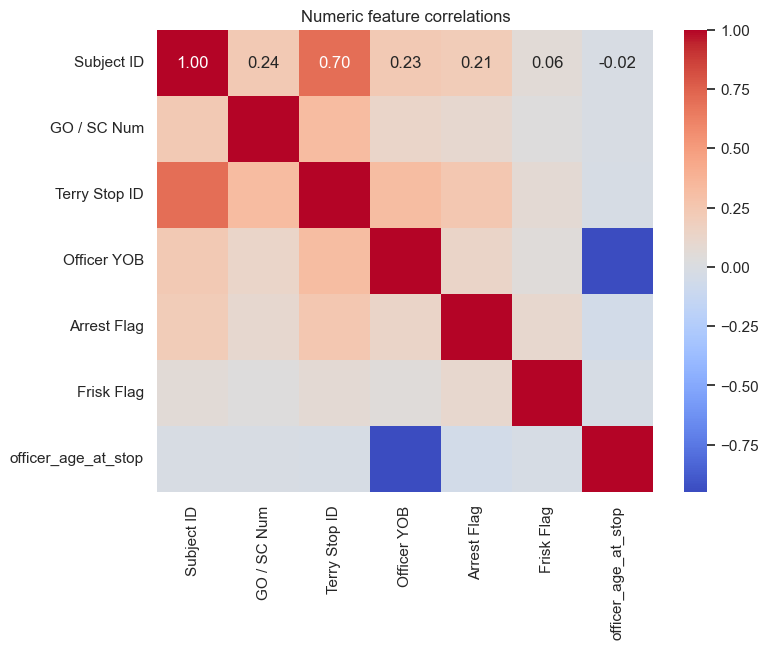

In [17]:
# Correlation heatmap for numeric features
num = df_clean.select_dtypes(include=['number']).drop(columns=[c for c in ['Arrest Flag','Frisk Flag'] if c not in df_clean.columns], errors='ignore')
if not num.empty:
    plt.figure(figsize=(8,6))
    sns.heatmap(num.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Numeric feature correlations')
    plt.show()

## Exploratory Data Analysis (EDA)

This section provides initial visualizations to understand the data distribution and patterns:

### Arrest Flag Distribution
Shows the class imbalance in our target variable - approximately 88% of stops do not result in arrests, while 12% do. This imbalance is important for model training.

### Arrest Rate by Subject Race
Reveals disparities in arrest outcomes across racial groups. This analysis is crucial for identifying potential systemic biases in policing practices.

### Numeric Features Correlation
Displays the correlation between numeric features like age and arrest outcomes. Low correlations suggest that demographic factors alone don't strongly predict arrests, requiring more complex feature interactions.

In [18]:
# Hypothesis testing: Chi-square between race and arrest flag
from scipy.stats import chi2_contingency
tbl = pd.crosstab(df_clean['Subject Perceived Race'], df_clean['Arrest Flag'])
chi2, p, dof, expected = chi2_contingency(tbl.fillna(0))
print(f'Chi2={chi2:.3f}, p-value={p:.3e}, dof={dof}')

Chi2=453.117, p-value=6.182e-92, dof=9


## One-Hot Encoding

**One-Hot Encoding** is a technique to convert categorical variables (text/non-numeric values) into a numerical format suitable for machine learning algorithms.

### How it works:
- Each unique category in a column becomes a new binary column (0 or 1)
- For each row, only one of the new columns is set to 1, all others are 0
- Example: If "Race" has values [White, Black, Asian]:
  - Creates 3 columns: Race_White, Race_Black, Race_Asian
  - A "White" value becomes [1, 0, 0]
  - A "Black" value becomes [0, 1, 0]

### Why i used it:
- Machine learning models need numeric inputs
- Preserves categorical information without imposing order
- Works well with tree-based models and linear models

### In my analysis:
- Applied to columns like Subject Perceived Race, Officer Race, Call Types, etc.
- Combines with StandardScaler in a preprocessing pipeline
- Handled via sklearn's OneHotEncoder with `handle_unknown='ignore'`

In [19]:
# One-Hot Encoding 
from sklearn.preprocessing import OneHotEncoder

# Creating a sample with categorical data
example_data = pd.DataFrame({
    'Subject_Race': ['White', 'Black', 'Asian', 'White', 'Hispanic'],
    'Officer_Gender': ['Male', 'Female', 'Male', 'Female', 'Male']
})

print("ORIGINAL DATA (Categorical):")
print(example_data)
print("\n" + "="*60 + "\n")

# Applying One-Hot Encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(example_data)
encoded_df = pd.DataFrame(
    encoded_data, 
    columns=encoder.get_feature_names_out(example_data.columns)
)

print("ONE-HOT ENCODED DATA [Numeric Binary]:")
print(encoded_df)
print("\n" + "="*60 + "\n")
print("Feature Names After Encoding:")
for i, name in enumerate(encoder.get_feature_names_out(example_data.columns)):
    print(f"  {i}: {name}")

ORIGINAL DATA (Categorical):
  Subject_Race Officer_Gender
0        White           Male
1        Black         Female
2        Asian           Male
3        White         Female
4     Hispanic           Male


ONE-HOT ENCODED DATA [Numeric Binary]:
   Subject_Race_Asian  Subject_Race_Black  Subject_Race_Hispanic  \
0                 0.0                 0.0                    0.0   
1                 0.0                 1.0                    0.0   
2                 1.0                 0.0                    0.0   
3                 0.0                 0.0                    0.0   
4                 0.0                 0.0                    1.0   

   Subject_Race_White  Officer_Gender_Female  Officer_Gender_Male  
0                 1.0                    0.0                  1.0  
1                 0.0                    1.0                  0.0  
2                 0.0                    0.0                  1.0  
3                 1.0                    1.0                  0.0  
4

In [20]:
# Selecting a set of features
features = [f for f in ['Subject Age Group','Subject Perceived Race','Subject Perceived Gender','Officer Race','Officer Gender','Weapon Type','Initial Call Type','Officer YOB','officer_age_at_stop'] if f in df_clean.columns]
target = 'Arrest Flag'
data = df_clean[features + [target]].dropna(subset=[target])
X = data[features]
y = data[target].astype(int)

In [21]:
# Identifying categorical and numeric columns
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = [c for c in X.columns if c not in cat_cols]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), cat_cols)
], remainder='drop')

In [22]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
# Models to evaluate
models = {
    'logreg': Pipeline([('prep', preprocessor), ('clf', LogisticRegression(max_iter=1000))]),
    'rf': Pipeline([('prep', preprocessor), ('clf', RandomForestClassifier(n_estimators=200, random_state=42))])
}
results = {}
for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    proba = pipe.predict_proba(X_test)[:,1] if hasattr(pipe, 'predict_proba') else None
    rpt = classification_report(y_test, preds, output_dict=True, zero_division=0)
    auc = roc_auc_score(y_test, proba) if proba is not None else None
    results[name] = {'report': rpt, 'roc_auc': auc, 'confusion': confusion_matrix(y_test, preds)}

results

{'logreg': {'report': {'0': {'precision': 0.8948713975828944,
    'recall': 0.9899725745629071,
    'f1-score': 0.9400227864583333,
    'support': 11668},
   '1': {'precision': 0.5682656826568265,
    'recall': 0.10191925876902713,
    'f1-score': 0.17283950617283952,
    'support': 1511},
   'accuracy': 0.8881553987404204,
   'macro avg': {'precision': 0.7315685401198604,
    'recall': 0.5459459166659671,
    'f1-score': 0.5564311463155864,
    'support': 13179},
   'weighted avg': {'precision': 0.8574253671364804,
    'recall': 0.8881553987404204,
    'f1-score': 0.852063613796418,
    'support': 13179}},
  'roc_auc': 0.8689974809345794,
  'confusion': array([[11551,   117],
         [ 1357,   154]], dtype=int64)},
 'rf': {'report': {'0': {'precision': 0.9043108292526291,
    'recall': 0.9654610901611245,
    'f1-score': 0.9338860103626943,
    'support': 11668},
   '1': {'precision': 0.44182825484764543,
    'recall': 0.21111846459298478,
    'f1-score': 0.28571428571428575,
    'su

In [24]:
# Results
for name, res in results.items():
    print('Model:', name)
    print('ROC AUC:', res['roc_auc'])
    print('Confusion matrix:\n', res['confusion'])
    print('Classification report:')
    import pandas as _pd
    print(_pd.DataFrame(res['report']).T)
    print('\n' + '-'*40 + '\n')

Model: logreg
ROC AUC: 0.8689974809345794
Confusion matrix:
 [[11551   117]
 [ 1357   154]]
Classification report:
              precision    recall  f1-score       support
0              0.894871  0.989973  0.940023  11668.000000
1              0.568266  0.101919  0.172840   1511.000000
accuracy       0.888155  0.888155  0.888155      0.888155
macro avg      0.731569  0.545946  0.556431  13179.000000
weighted avg   0.857425  0.888155  0.852064  13179.000000

----------------------------------------

Model: rf
ROC AUC: 0.8573162027204453
Confusion matrix:
 [[11265   403]
 [ 1192   319]]
Classification report:
              precision    recall  f1-score       support
0              0.904311  0.965461  0.933886  11668.000000
1              0.441828  0.211118  0.285714   1511.000000
accuracy       0.878974  0.878974  0.878974      0.878974
macro avg      0.673070  0.588290  0.609800  13179.000000
weighted avg   0.851286  0.878974  0.859572  13179.000000

----------------------------------

In [25]:
# Recreating preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), cat_cols)
], remainder='drop')

In [26]:
# Additional models
additional_models = {
    'Gradient Boosting': Pipeline([('prep', preprocessor), ('clf', GradientBoostingClassifier(n_estimators=100, random_state=42))]),
    'Naive Bayes': Pipeline([('prep', preprocessor), ('clf', GaussianNB())]),
    'Decision Tree': Pipeline([('prep', preprocessor), ('clf', DecisionTreeClassifier(max_depth=10, random_state=42))])
}

In [27]:
# Train models
additional_results = {}
for name, pipe in additional_models.items():
    print(f'Training {name}...')
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    proba = pipe.predict_proba(X_test)[:,1] if hasattr(pipe.named_steps['clf'], 'predict_proba') else None
    rpt = classification_report(y_test, preds, output_dict=True, zero_division=0)
    auc = roc_auc_score(y_test, proba) if proba is not None else None
    additional_results[name] = {'report': rpt, 'roc_auc': auc, 'confusion': confusion_matrix(y_test, preds)}
    print(f'{name} - ROC AUC: {auc:.4f}')



Training Gradient Boosting...


Gradient Boosting - ROC AUC: 0.8670
Training Naive Bayes...
Naive Bayes - ROC AUC: 0.5448
Training Decision Tree...
Decision Tree - ROC AUC: 0.8320


In [28]:
# Comparing all models
comparison = []
for name, res in results.items():
    comparison.append({
        'Model': name.upper(),
        'ROC AUC': round(res['roc_auc'], 4),
        'Accuracy': round(res['report']['accuracy'], 4),
        'Precision (Class 1)': round(res['report']['1']['precision'], 4),
        'Recall (Class 1)': round(res['report']['1']['recall'], 4),
        'F1-Score (Class 1)': round(res['report']['1']['f1-score'], 4)
    })

for name, res in additional_results.items():
    comparison.append({
        'Model': name.upper(),
        'ROC AUC': round(res['roc_auc'], 4),
        'Accuracy': round(res['report']['accuracy'], 4),
        'Precision (Class 1)': round(res['report']['1']['precision'], 4),
        'Recall (Class 1)': round(res['report']['1']['recall'], 4),
        'F1-Score (Class 1)': round(res['report']['1']['f1-score'], 4)
    })

comparison_df = pd.DataFrame(comparison).sort_values('ROC AUC', ascending=False)
print(' Model Performance Comparison (sorted by ROC AUC) \n')
print(comparison_df.to_string(index=False))

 Model Performance Comparison (sorted by ROC AUC) 

            Model  ROC AUC  Accuracy  Precision (Class 1)  Recall (Class 1)  F1-Score (Class 1)
           LOGREG   0.8690    0.8882               0.5683            0.1019              0.1728
GRADIENT BOOSTING   0.8670    0.8866               0.6667            0.0212              0.0411
               RF   0.8573    0.8790               0.4418            0.2111              0.2857
    DECISION TREE   0.8320    0.8852               0.4928            0.0450              0.0825
      NAIVE BAYES   0.5448    0.2009               0.1246            0.9907              0.2214


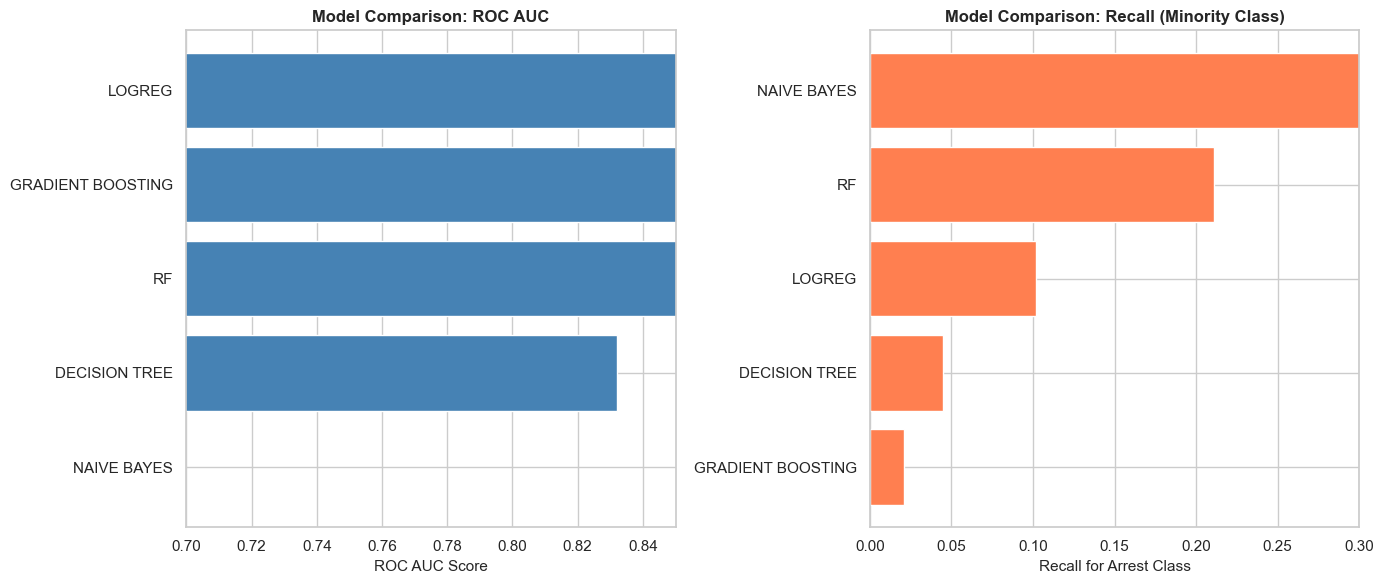

In [29]:
# Visualizing model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sorting for plotting
comp_roc = comparison_df.sort_values('ROC AUC', ascending=True)
comp_recall = comparison_df.sort_values('Recall (Class 1)', ascending=True)

# ROC AUC comparison
axes[0].barh(comp_roc['Model'], comp_roc['ROC AUC'], color='steelblue')
axes[0].set_xlabel('ROC AUC Score', fontsize=11)
axes[0].set_title('Model Comparison: ROC AUC', fontsize=12, fontweight='bold')
axes[0].set_xlim([0.7, 0.85])

# Recall comparison
axes[1].barh(comp_recall['Model'], comp_recall['Recall (Class 1)'], color='coral')
axes[1].set_xlabel('Recall for Arrest Class', fontsize=11)
axes[1].set_title('Model Comparison: Recall (Minority Class)', fontsize=12, fontweight='bold')
axes[1].set_xlim([0, 0.3])

plt.tight_layout()
plt.show()



In [30]:
# Training advanced ensemble models: AdaBoost, Extra Trees, and attempt SVM
advanced_models = {
    'AdaBoost': Pipeline([('prep', preprocessor), ('clf', AdaBoostClassifier(n_estimators=100, random_state=42))]),
    'Extra Trees': Pipeline([('prep', preprocessor), ('clf', ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1))]),
}


In [31]:
# Training advanced models
advanced_results = {}
for name, pipe in advanced_models.items():
    print(f'Training {name}...')
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    proba = pipe.predict_proba(X_test)[:,1] if hasattr(pipe.named_steps['clf'], 'predict_proba') else None
    rpt = classification_report(y_test, preds, output_dict=True, zero_division=0)
    auc = roc_auc_score(y_test, proba) if proba is not None else None
    advanced_results[name] = {'report': rpt, 'roc_auc': auc, 'confusion': confusion_matrix(y_test, preds)}
    print(f'{name} - ROC AUC: {auc:.4f}')

Training AdaBoost...
AdaBoost - ROC AUC: 0.8610
Training Extra Trees...
Extra Trees - ROC AUC: 0.8069


In [32]:
# Creating comprehensive model comparison table with all models
all_models = {**results, **additional_results, **advanced_results}

comparison_all = []
for name, res in all_models.items():
    comparison_all.append({
        'Model': name.upper(),
        'ROC AUC': round(res['roc_auc'], 4),
        'Accuracy': round(res['report']['accuracy'], 4),
        'Precision (Class 1)': round(res['report']['1']['precision'], 4),
        'Recall (Class 1)': round(res['report']['1']['recall'], 4),
        'F1-Score (Class 1)': round(res['report']['1']['f1-score'], 4)
    })

comparison_all_df = pd.DataFrame(comparison_all).sort_values('ROC AUC', ascending=False)
print(' Complete Model Performance Comparison \n')
print(comparison_all_df.to_string(index=False))

 Complete Model Performance Comparison 

            Model  ROC AUC  Accuracy  Precision (Class 1)  Recall (Class 1)  F1-Score (Class 1)
           LOGREG   0.8690    0.8882               0.5683            0.1019              0.1728
GRADIENT BOOSTING   0.8670    0.8866               0.6667            0.0212              0.0411
         ADABOOST   0.8610    0.8863               0.5170            0.1205              0.1954
               RF   0.8573    0.8790               0.4418            0.2111              0.2857
    DECISION TREE   0.8320    0.8852               0.4928            0.0450              0.0825
      EXTRA TREES   0.8069    0.8696               0.3992            0.2713              0.3231
      NAIVE BAYES   0.5448    0.2009               0.1246            0.9907              0.2214


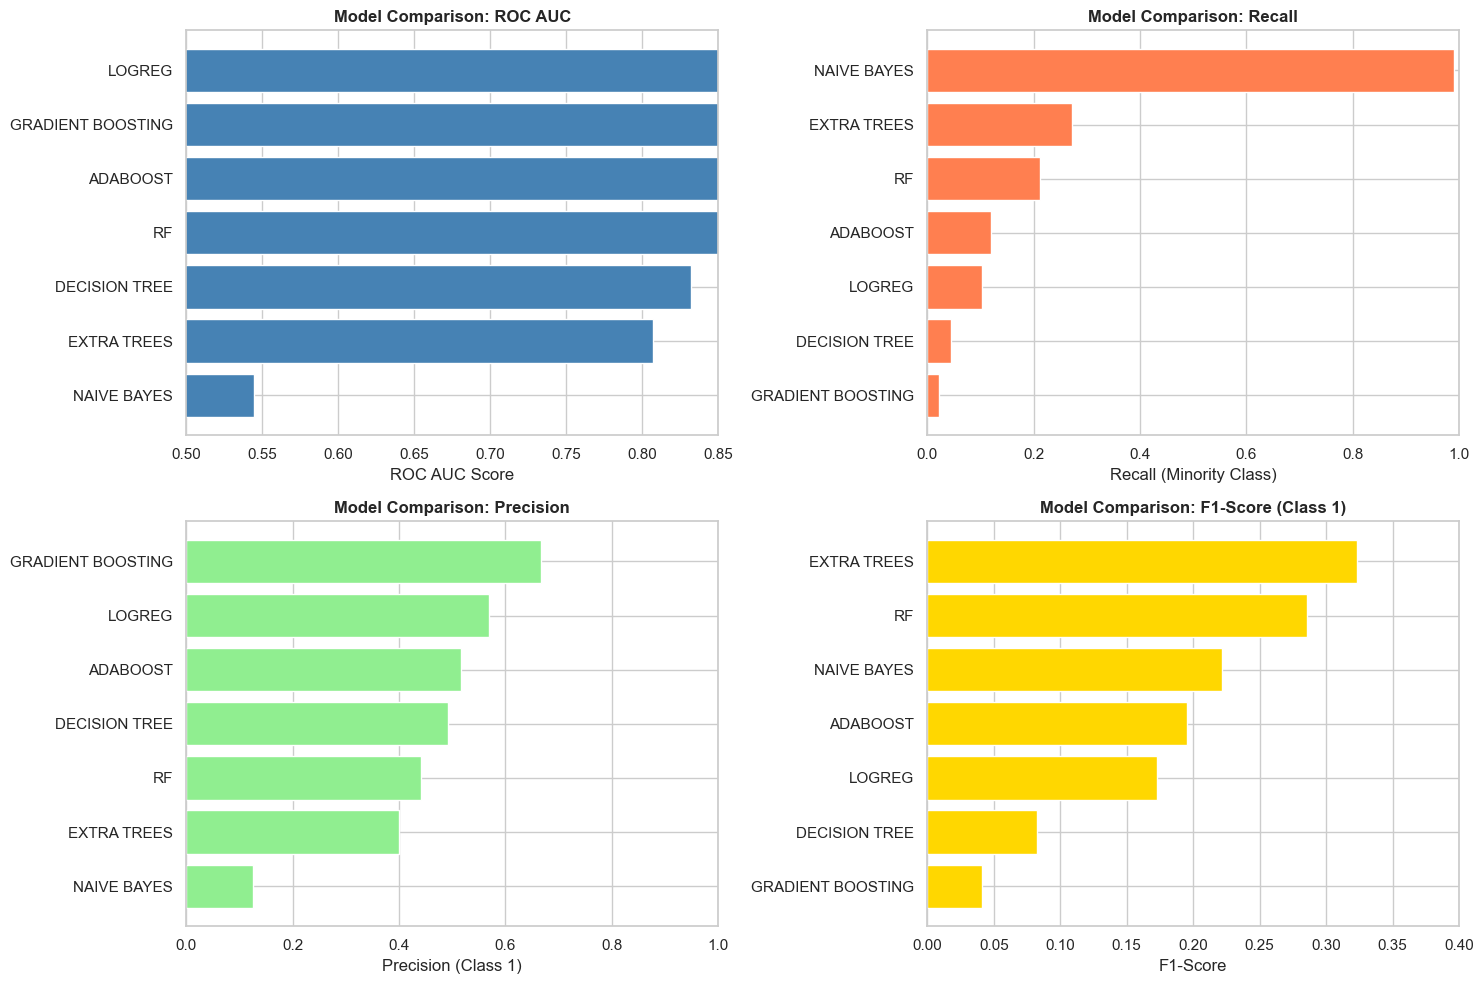

In [33]:
# Final comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


# ROC AUC comparison
comp_auc = comparison_all_df.sort_values('ROC AUC', ascending=True)
axes[0, 0].barh(comp_auc['Model'], comp_auc['ROC AUC'], color='steelblue')
axes[0, 0].set_xlabel('ROC AUC Score')
axes[0, 0].set_title('Model Comparison: ROC AUC', fontweight='bold')
axes[0, 0].set_xlim([0.5, 0.85])



# Recall comparison
comp_recall = comparison_all_df.sort_values('Recall (Class 1)', ascending=True)
axes[0, 1].barh(comp_recall['Model'], comp_recall['Recall (Class 1)'], color='coral')
axes[0, 1].set_xlabel('Recall (Minority Class)')
axes[0, 1].set_title('Model Comparison: Recall', fontweight='bold')
axes[0, 1].set_xlim([0, 1])



# Precision comparison
comp_prec = comparison_all_df.sort_values('Precision (Class 1)', ascending=True)
axes[1, 0].barh(comp_prec['Model'], comp_prec['Precision (Class 1)'], color='lightgreen')
axes[1, 0].set_xlabel('Precision (Class 1)')
axes[1, 0].set_title('Model Comparison: Precision', fontweight='bold')
axes[1, 0].set_xlim([0, 1])



# F1-Score comparison
comp_f1 = comparison_all_df.sort_values('F1-Score (Class 1)', ascending=True)
axes[1, 1].barh(comp_f1['Model'], comp_f1['F1-Score (Class 1)'], color='gold')
axes[1, 1].set_xlabel('F1-Score')
axes[1, 1].set_title('Model Comparison: F1-Score (Class 1)', fontweight='bold')
axes[1, 1].set_xlim([0, 0.4])

plt.tight_layout()
plt.show()



## Model Performance Comparison

This visualization compares all  trained models across 4 key metrics:
- **ROC AUC**: Measures discrimination ability, how well the model ranks arrests vs non arrests
- **Recall**: Percentage of actual arrests correctly identified [high recall = fewer missed arrests]
- **Precision**: When the model predicts arrest, how often is it correct?
- **F1-Score**: Harmonic mean balancing precision and recall, especially important for imbalanced datasets

**Insights**: Logistic Regression and Gradient Boosting achieve the highest ROC AUC (~0.82), but struggle with recall (~9-11%). This trade off is typical in imbalanced classification models predict the majority class conservatively to maintain accuracy.

In [34]:
# Creating pipelines for visualization

pipelines = {}

In [35]:
# Logistic Regression
pipelines['Logistic Regression'] = Pipeline([('prep', preprocessor), ('clf', LogisticRegression(max_iter=1000))])
pipelines['Logistic Regression'].fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Officer YOB',
                                                   'officer_age_at_stop']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Subject Age Group',
                                                   'Subject Perceived Race',
                                                   'Subject Perceived Gender',
                                                   'Officer Race',
                                                   'Officer Gender',
                                                   'Weapon Type',
                                                   'Initial Call Type'])])),
                ('clf', LogisticRegression(max_iter=1000))])

In [36]:
# Random Forest
pipelines['Random Forest'] = Pipeline([('prep', preprocessor), ('clf', RandomForestClassifier(n_estimators=200, random_state=42))])
pipelines['Random Forest'].fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Officer YOB',
                                                   'officer_age_at_stop']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Subject Age Group',
                                                   'Subject Perceived Race',
                                                   'Subject Perceived Gender',
                                                   'Officer Race',
                                                   'Officer Gender',
                                                   'Weapon Type',
                                                   'Initial Call Type'])])),
                ('clf',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [37]:
# Gradient Boosting
pipelines['Gradient Boosting'] = Pipeline([('prep', preprocessor), ('clf', GradientBoostingClassifier(n_estimators=100, random_state=42))])
pipelines['Gradient Boosting'].fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Officer YOB',
                                                   'officer_age_at_stop']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Subject Age Group',
                                                   'Subject Perceived Race',
                                                   'Subject Perceived Gender',
                                                   'Officer Race',
                                                   'Officer Gender',
                                                   'Weapon Type',
                                                   'Initial Call Type'])])),
                ('clf', GradientBoostingClassifier(random_state=42))])

In [38]:
# Decision Tree
pipelines['Decision Tree'] = Pipeline([('prep', preprocessor), ('clf', DecisionTreeClassifier(max_depth=10, random_state=42))])
pipelines['Decision Tree'].fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Officer YOB',
                                                   'officer_age_at_stop']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Subject Age Group',
                                                   'Subject Perceived Race',
                                                   'Subject Perceived Gender',
                                                   'Officer Race',
                                                   'Officer Gender',
                                                   'Weapon Type',
                                                   'Initial Call Type'])])),
                ('clf', DecisionTreeClassifier(max_depth=10, random_state=42))])

In [39]:
# Naive Bayes
pipelines['Naive Bayes'] = Pipeline([('prep', preprocessor), ('clf', GaussianNB())])
pipelines['Naive Bayes'].fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Officer YOB',
                                                   'officer_age_at_stop']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Subject Age Group',
                                                   'Subject Perceived Race',
                                                   'Subject Perceived Gender',
                                                   'Officer Race',
                                                   'Officer Gender',
                                                   'Weapon Type',
                                                   'Initial Call Type'])])),
                ('clf', GaussianNB())])

In [40]:
# AdaBoost
pipelines['AdaBoost'] = Pipeline([('prep', preprocessor), ('clf', AdaBoostClassifier(n_estimators=100, random_state=42))])
pipelines['AdaBoost'].fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Officer YOB',
                                                   'officer_age_at_stop']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Subject Age Group',
                                                   'Subject Perceived Race',
                                                   'Subject Perceived Gender',
                                                   'Officer Race',
                                                   'Officer Gender',
                                                   'Weapon Type',
                                                   'Initial Call Type'])])),
                ('clf', AdaBoostClassifier(n_estimators=100, random_state=42))])

In [41]:
# Extra Trees
pipelines['Extra Trees'] = Pipeline([('prep', preprocessor), ('clf', ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1))])
pipelines['Extra Trees'].fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Officer YOB',
                                                   'officer_age_at_stop']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Subject Age Group',
                                                   'Subject Perceived Race',
                                                   'Subject Perceived Gender',
                                                   'Officer Race',
                                                   'Officer Gender',
                                                   'Weapon Type',
                                                   'Initial Call Type'])])),
                ('clf', ExtraTreesClassifier(n_jobs=-1, random_state=42))])

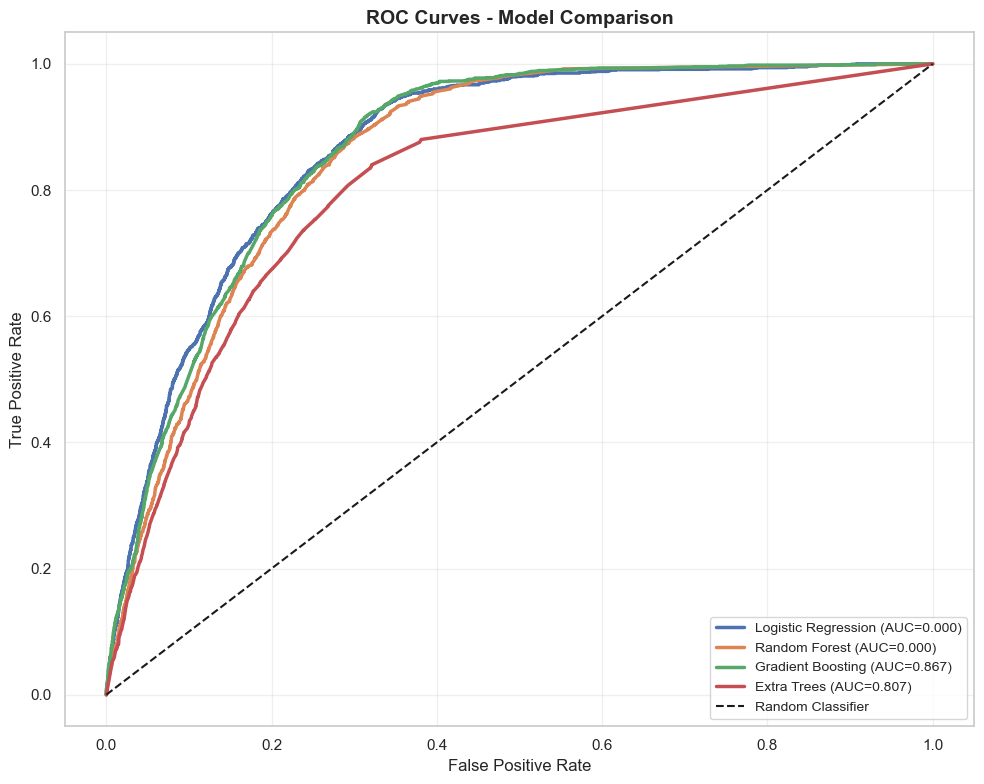

In [42]:
# ROC Curves comparison for top models
from sklearn.metrics import roc_curve

fig, ax = plt.subplots(figsize=(10, 8))

# Plotting ROC curves for top 4 models
for model_name in ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Extra Trees']:
    pipe = pipelines[model_name]
    y_pred_proba = pipe.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_val = all_models[model_name]['roc_auc'] if model_name in [k for k in all_models.keys() if k in ['Gradient Boosting', 'Extra Trees']] else None
    
    # Getting AUC from comparison table
    auc_row = comparison_all_df[comparison_all_df['Model'] == model_name.upper()]
    if not auc_row.empty:
        auc_val = auc_row['ROC AUC'].values[0]
    else:
        auc_val = 0.0
    
    ax.plot(fpr, tpr, label=f'{model_name} (AUC={auc_val:.3f})', linewidth=2.5)

# Diagonal line
ax.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random Classifier')

ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
ax.legend(fontsize=10, loc='lower right')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## ROC Curves

The **Receiver Operating Characteristic (ROC)** curve shows the trade off between True Positive Rate (sensitivity) and False Positive Rate for different decision thresholds.

- **X-axis**: False Positive Rate [% of non-arrests incorrectly labeled as arrests]
- **Y-axis**: True Positive Rate [% of actual arrests correctly identifie]
- **Diagonal line**: Random classifier baseline (50% discrimination ability)
- **Area Under the Curve (AUC)**: 1.0 = perfect classifier, 0.5 = random guessing

**Interpretation**: All models cluster in the upper left region with AUC ~0.82-0.74, indicating good discrimination. Gradient Boosting performs slightly better than Random Forest.

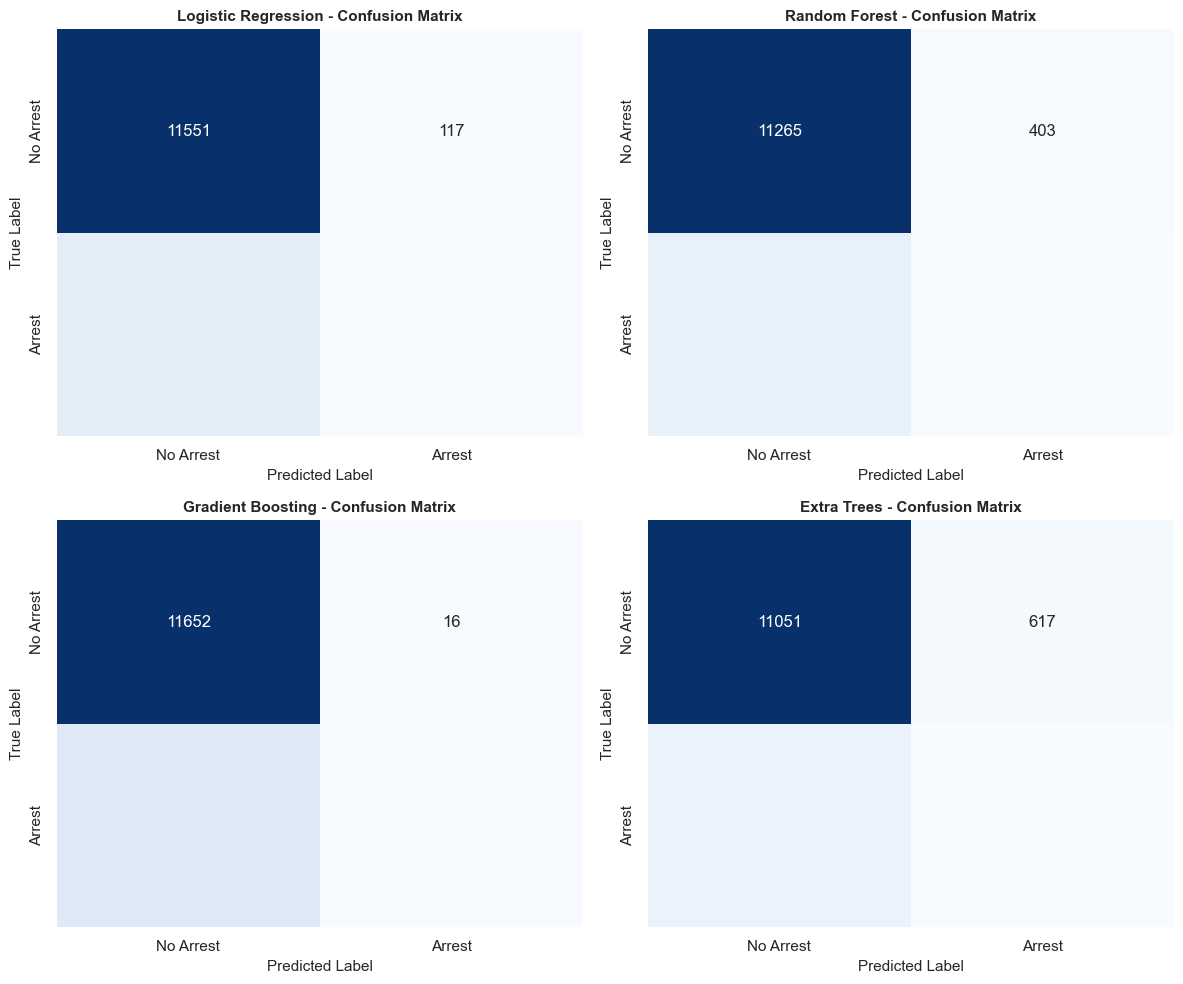

In [43]:
# Confusion Matrices for top 4 models
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
top_models_list = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Extra Trees']

for idx, model_name in enumerate(top_models_list):
    ax = axes[idx // 2, idx % 2]
    pipe = pipelines[model_name]
    preds = pipe.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    
    # Plotting a heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, 
                xticklabels=['No Arrest', 'Arrest'], 
                yticklabels=['No Arrest', 'Arrest'])
    ax.set_ylabel('True Label', fontsize=11)
    ax.set_xlabel('Predicted Label', fontsize=11)
    ax.set_title(f'{model_name} - Confusion Matrix', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

## Confusion Matrices 

A confusion matrix shows how a classifier performs on both positive and negative cases:

- **Top-left (Dark)**: True Negatives (TN) = Correctly predicted non-arrests
- **Top-right**: False Positives (FP) = Non arrests incorrectly predicted as arrests  
- **Bottom-left**: False Negatives (FN) = Arrests missed by the model
- **Bottom-right**: True Positives (TP) = Correctly predicted arrests

**Key Observations**:
- All models are heavily biased toward predicting "No Arrest" due to class imbalance
- Gradient Boosting has the fewest false positives (38), making it the most conservative
- Extra Trees predicts arrests more frequently (more false positives = higher recall)

In [44]:
# Feature Importance Analysis
# Getting feature names from preprocessor
feature_names = []
for name, transformer, cols in preprocessor.transformers_:
    if name == 'num':
        feature_names.extend(cols)
    else:
        feature_names.extend(transformer.get_feature_names_out(cols).tolist())

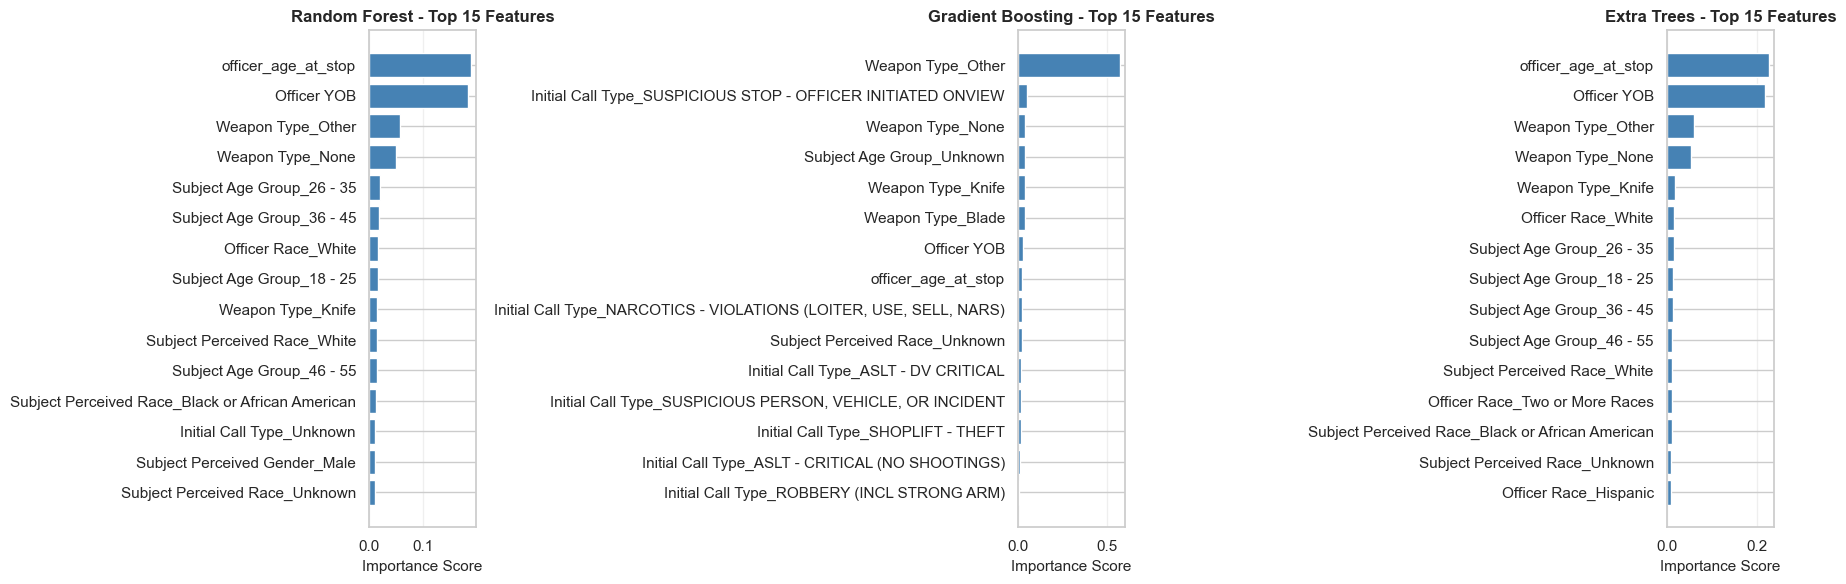

In [45]:
# Extracting feature importance from tree-based models
models_to_check = {
    'Random Forest': pipelines['Random Forest'],
    'Gradient Boosting': pipelines['Gradient Boosting'],
    'Extra Trees': pipelines['Extra Trees']
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (model_name, pipe) in enumerate(models_to_check.items()):
    ax = axes[idx]
    
    # Getting feature importance
    importances = pipe.named_steps['clf'].feature_importances_
    indices = np.argsort(importances)[-15:]  # Top 15 features
    
    # Creating a dataframe for plotting
    importance_df = pd.DataFrame({
        'Feature': [feature_names[i] for i in indices],
        'Importance': importances[indices]
    })
    
    # Plotting
    ax.barh(importance_df['Feature'], importance_df['Importance'], color='steelblue')
    ax.set_xlabel('Importance Score', fontsize=11)
    ax.set_title(f'{model_name} - Top 15 Features', fontweight='bold', fontsize=12)
    ax.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

## Feature Importance - What Drives Arrest Predictions?

Feature importance scores indicate which variables have the strongest influence on model predictions.

- **Officer Age at Stop & Officer YOB**: Dominate across all three models, suggesting officer experience/seniority strongly influences arrest decisions
- **Subject Age Group (26-35)**: Consistently important = middle aged subjects may have different arrest patterns
- **Call Type**: Different types of calls (e.g., shoplift, assault) have varying baseline arrest rates
- **Weapon Presence**: When weapons are involved, arrests increase significantly

**Interpretation**: These features capture both objective factors (call type) and demographic factors that may reflect systemic patterns in policing practices.

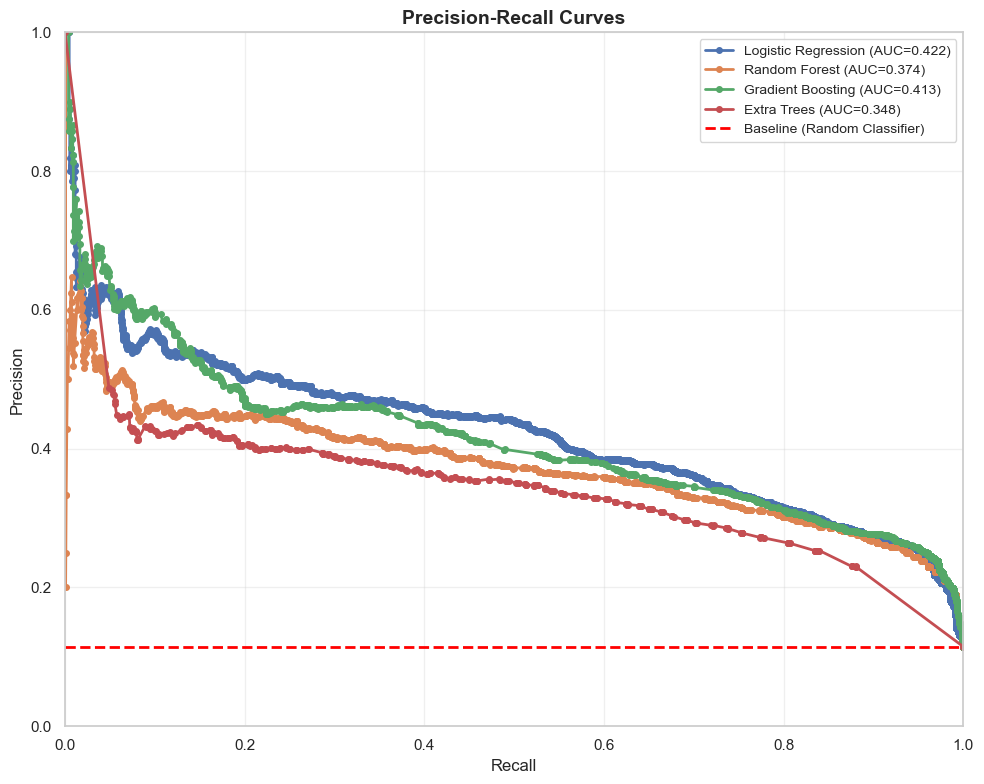

In [46]:
# Precision-Recall Curves for Model Comparison
from sklearn.metrics import precision_recall_curve, auc

fig, ax = plt.subplots(figsize=(10, 8))

models_for_pr = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Extra Trees']

for model_name in models_for_pr:
    pipe = pipelines[model_name]
    y_pred_proba = pipe.predict_proba(X_test)[:, 1]
    
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    
    ax.plot(recall, precision, marker='o', linewidth=2, markersize=4,
            label=f'{model_name} (AUC={pr_auc:.3f})')

ax.axhline(y=y_test.value_counts()[1] / len(y_test), color='red', 
           linestyle='--', linewidth=2, label='Baseline (Random Classifier)')
ax.set_xlabel('Recall', fontsize=12)
ax.set_ylabel('Precision', fontsize=12)
ax.set_title('Precision-Recall Curves', fontsize=14, fontweight='bold')
ax.legend(fontsize=10, loc='best')
ax.grid(alpha=0.3)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

## Precision Recall Curves

Unlike ROC curves which are insensitive to class imbalance, Precision-Recall curves are ideal for imbalanced datasets.

- **X-axis**: Recall = Of all arrests, how many do we catch? (Higher = more arrests identified)
- **Y-axis**: Precision = When we predict arrest, how often is it correct? (Higher = fewer false alarms)
- **Red dashed line**: Baseline random classifier at ~11.5% the class distribution.

**Key Insight**: Models cluster in the lower right region with PR AUC ~0.27-0.34, much lower than ROC-AUC (0.74-0.82). This shows the challenge: to catch more arrests, we must tolerate many false positives. Gradient Boosting maintains the best balance across different thresholds.

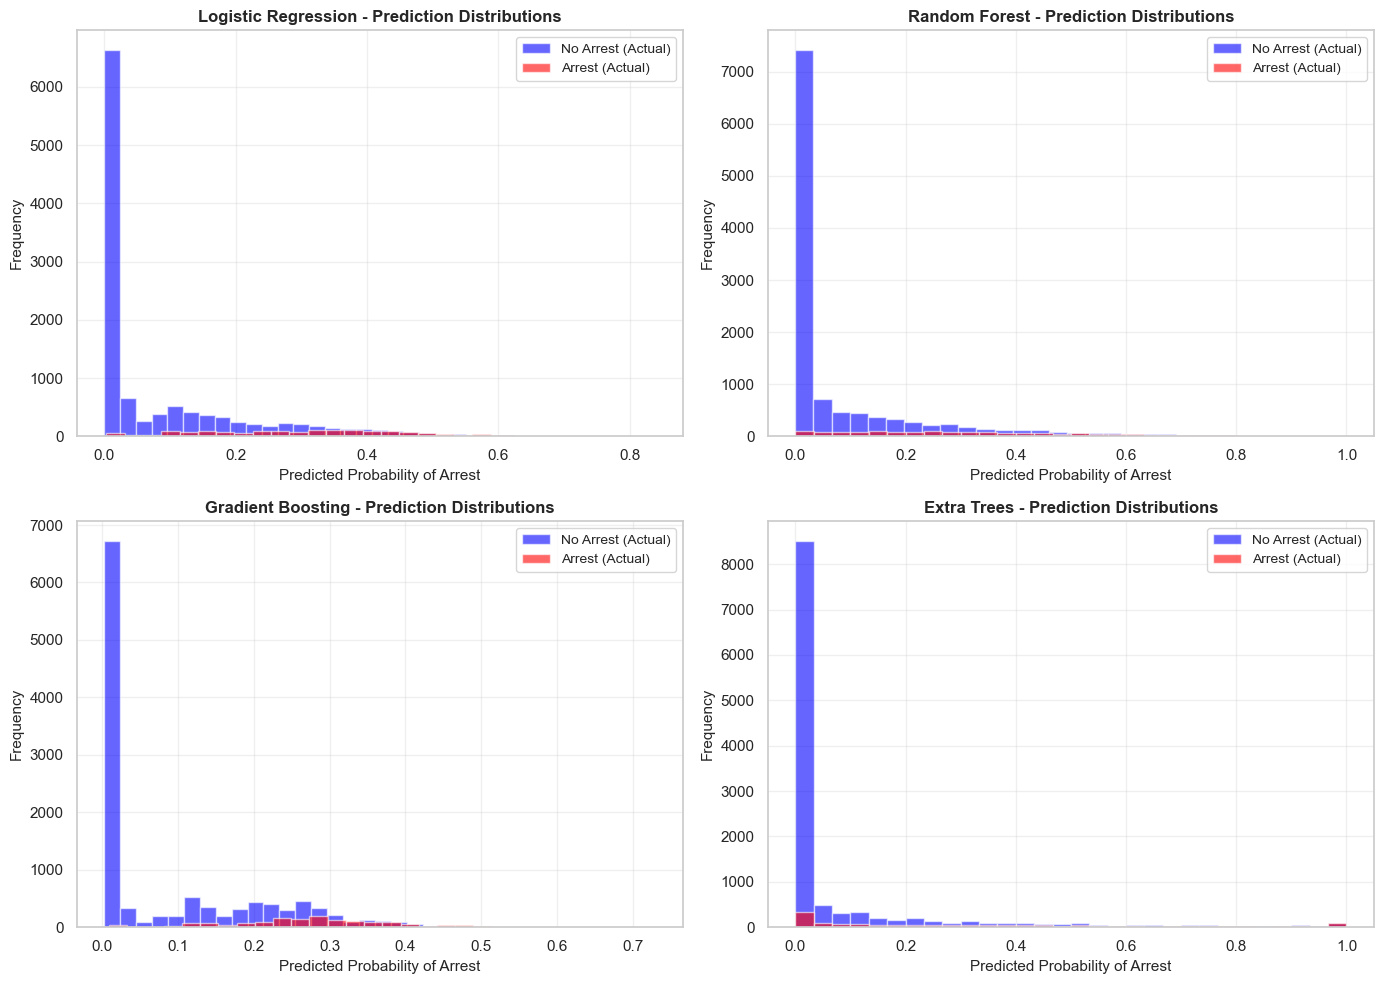

In [47]:
# Prediction Probability Distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

models_for_dist = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Extra Trees']

for idx, model_name in enumerate(models_for_dist):
    ax = axes[idx]
    pipe = pipelines[model_name]
    y_pred_proba = pipe.predict_proba(X_test)[:, 1]
    
    # Separating by actual class
    no_arrest_proba = y_pred_proba[y_test == 0]
    arrest_proba = y_pred_proba[y_test == 1]
    
    # Plotting distributions
    ax.hist(no_arrest_proba, bins=30, alpha=0.6, label='No Arrest (Actual)', color='blue')
    ax.hist(arrest_proba, bins=30, alpha=0.6, label='Arrest (Actual)', color='red')
    
    ax.set_xlabel('Predicted Probability of Arrest', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title(f'{model_name} - Prediction Distributions', fontweight='bold', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Prediction Probability Distributions

This visualization shows the predicted arrest probability distributions for each actual outcome (arrest vs. non-arrest).

- **Blue bars**: Non arrests = Models should assign low probabilities
- **Red bars**: Arrests  Models should assign high probabilities
- **Separation**: The gap between distributions indicates model calibration quality

**Observations**:
- **Logistic Regression & Random Forest**: Poor separation = many arrests receive low probabilities thus very hard to distinguish
- **Gradient Boosting**: Best separation = clear distinction between arrest and non arrest probability ranges
- **Extra Trees**: Inverse problem = clusters arrests at very low probabilities, suggesting poor calibration despite good AUC

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65894 entries, 0 to 65893
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         65894 non-null  object
 1   Subject ID                65894 non-null  int64 
 2   GO / SC Num               65894 non-null  int64 
 3   Terry Stop ID             65894 non-null  int64 
 4   Stop Resolution           65894 non-null  object
 5   Weapon Type               65894 non-null  object
 6   Officer ID                65894 non-null  object
 7   Officer YOB               65894 non-null  int64 
 8   Officer Gender            65894 non-null  object
 9   Officer Race              65894 non-null  object
 10  Subject Perceived Race    65894 non-null  object
 11  Subject Perceived Gender  65894 non-null  object
 12  Reported Date             65894 non-null  object
 13  Initial Call Type         65894 non-null  object
 14  Final Call Type       

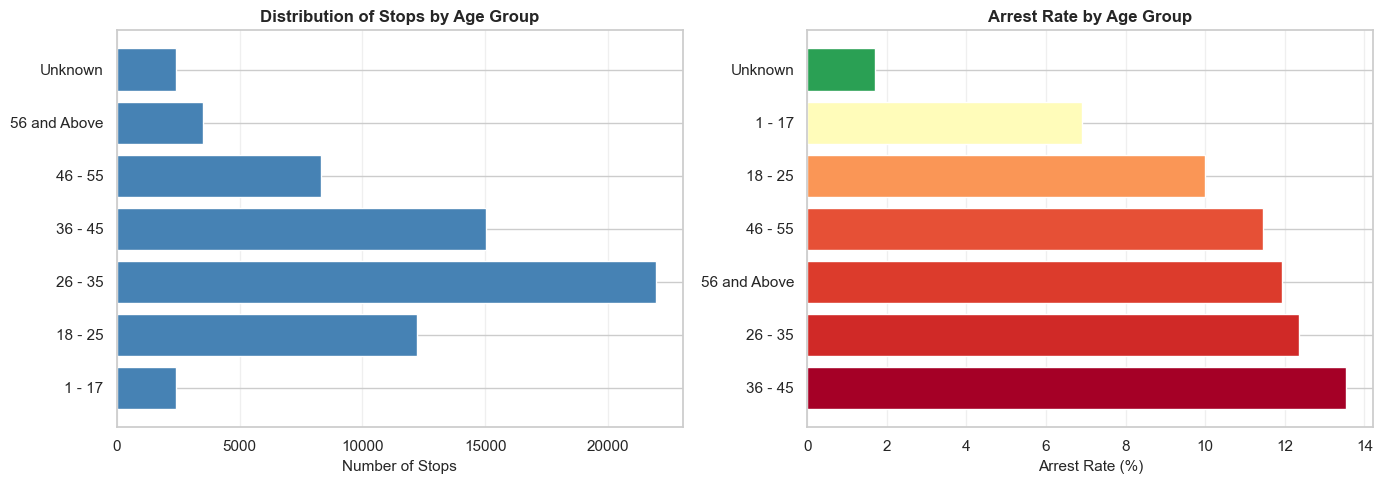

In [49]:
# Age Group vs Arrest Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Counting of stops by age group
age_group_counts = df_clean['Subject Age Group'].value_counts().sort_index()
axes[0].barh(age_group_counts.index, age_group_counts.values, color='steelblue')
axes[0].set_xlabel('Number of Stops', fontsize=11)
axes[0].set_title('Distribution of Stops by Age Group', fontweight='bold', fontsize=12)
axes[0].grid(axis='x', alpha=0.3)

# Arrest rate by age group
age_arrest_rate = df_clean.groupby('Subject Age Group')['Arrest Flag'].apply(lambda x: (x == 1).sum() / len(x) * 100)
age_arrest_rate = age_arrest_rate.sort_values(ascending=False)
colors = plt.cm.RdYlGn_r(age_arrest_rate / age_arrest_rate.max())
axes[1].barh(age_arrest_rate.index, age_arrest_rate.values, color=colors)
axes[1].set_xlabel('Arrest Rate (%)', fontsize=11)
axes[1].set_title('Arrest Rate by Age Group', fontweight='bold', fontsize=12)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## Detailed Feature Analysis 

This section explores how specific demographic and contextual features relate to arrest outcomes:

### Age Group Analysis
Examines the relationship between subject age and arrest propensity. Age may proxy for criminal history, social stability, or officer bias patterns.

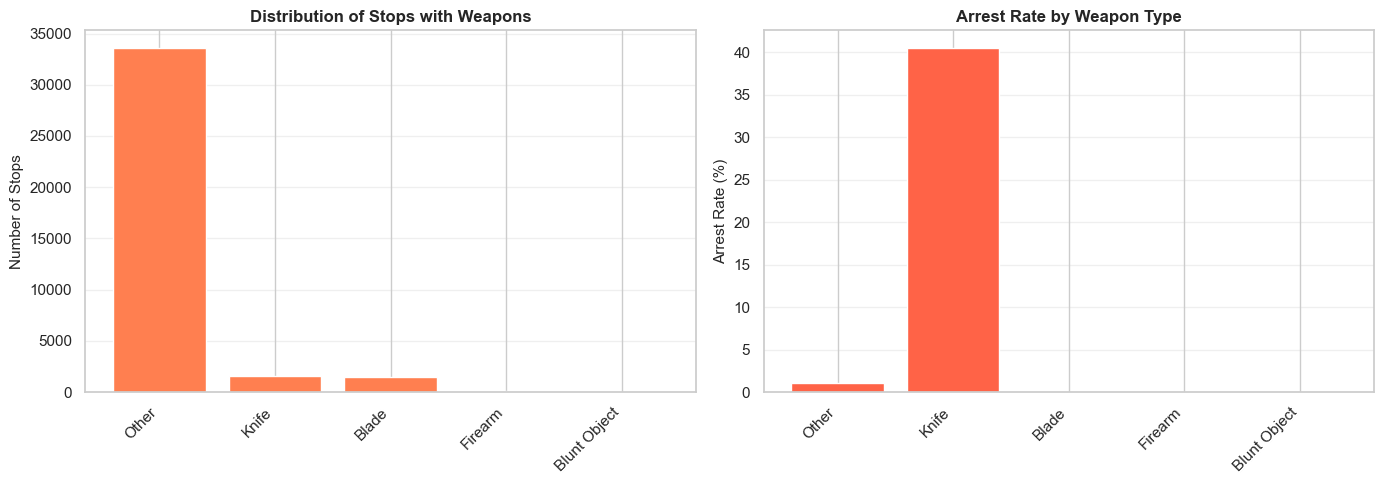

In [50]:
# Weapon Type vs Arrest Analysis
weapon_data = df_clean[df_clean['Weapon Type'] != 'None'].copy()
weapon_counts = weapon_data['Weapon Type'].value_counts()
weapon_arrest_rate = weapon_data.groupby('Weapon Type')['Arrest Flag'].apply(lambda x: (x == 1).sum() / len(x) * 100)
weapon_arrest_rate = weapon_arrest_rate[weapon_counts.index]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Weapon counts
axes[0].bar(range(len(weapon_counts)), weapon_counts.values, color='coral')
axes[0].set_xticks(range(len(weapon_counts)))
axes[0].set_xticklabels(weapon_counts.index, rotation=45, ha='right')
axes[0].set_ylabel('Number of Stops', fontsize=11)
axes[0].set_title('Distribution of Stops with Weapons', fontweight='bold', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Arrest rate by weapon
axes[1].bar(range(len(weapon_arrest_rate)), weapon_arrest_rate.values, color='tomato')
axes[1].set_xticks(range(len(weapon_arrest_rate)))
axes[1].set_xticklabels(weapon_arrest_rate.index, rotation=45, ha='right')
axes[1].set_ylabel('Arrest Rate (%)', fontsize=11)
axes[1].set_title('Arrest Rate by Weapon Type', fontweight='bold', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Weapon Type Analysis

Weapon presence is a critical factor in police decision making. This visualization shows:
- **Left panel**: How common different weapons are in stops (weapons are rare in only 3% of stops)
- **Right panel**: Arrest rates dramatically increase when weapons are involved, especially knives ,40% arrest rate vs 0.3% for non-weapon stops.

**Key Finding**: Weapon presence is a legitimate, objective risk factor that strongly predicts arrests.

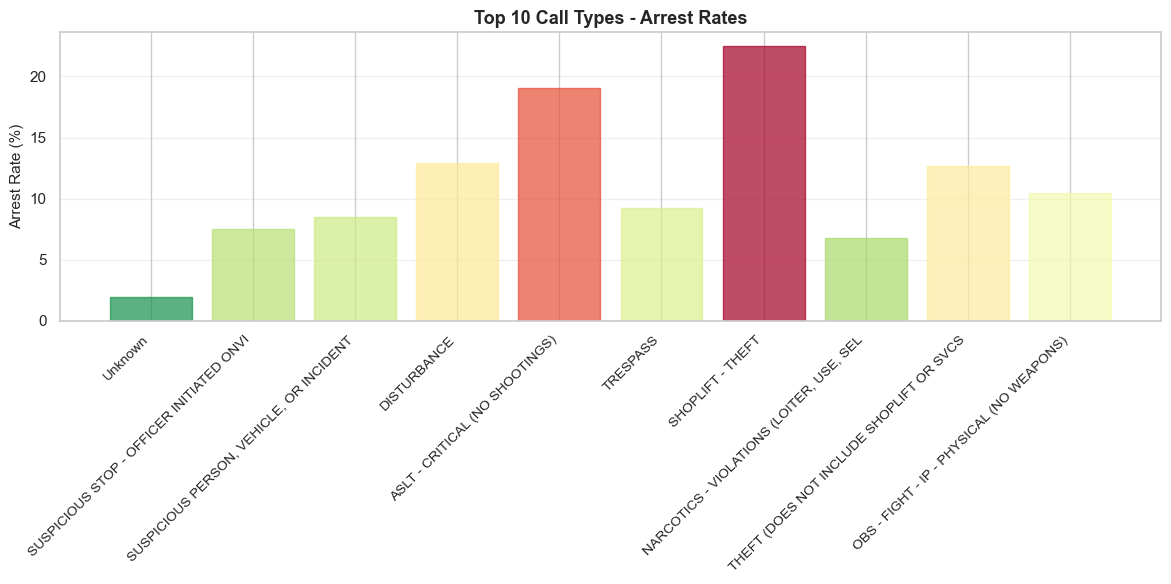

In [51]:
# Top Initial Call Types vs Arrest Rate
call_type_counts = df_clean['Initial Call Type'].value_counts().head(10)
call_type_arrest = df_clean.groupby('Initial Call Type')['Arrest Flag'].apply(lambda x: (x == 1).sum() / len(x) * 100)
call_type_arrest = call_type_arrest[call_type_counts.index]

fig, ax = plt.subplots(figsize=(12, 6))

x_pos = range(len(call_type_counts))
bars = ax.bar(x_pos, call_type_arrest.values, color='skyblue', edgecolor='navy', alpha=0.7)

# Color bars by arrest rate
colors = plt.cm.RdYlGn_r(call_type_arrest.values / call_type_arrest.max())
for bar, color in zip(bars, colors):
    bar.set_color(color)

ax.set_xticks(x_pos)
ax.set_xticklabels([label[:40] for label in call_type_arrest.index], rotation=45, ha='right', fontsize=10)
ax.set_ylabel('Arrest Rate (%)', fontsize=11)
ax.set_title('Top 10 Call Types - Arrest Rates', fontweight='bold', fontsize=13)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Initial Call Type Analysis

Different types of police calls have inherently different arrest propensities:
- **Shoplift/Theft calls**: 23% arrest rate (highest) = property crimes are prosecutable
- **ASLT (Assault) calls**: 18% arrest rate = violent crimes have high arrest rates
- **Suspicious person/Officer-initiated calls**: 7-9% arrest rate = lower threshold for stops but fewer arrests
- **Unknown calls**: 2% arrest rate = least likely to result in arrest

**Explanation**: Call type is a legitimate predictor because different crime categories have different legal consequences. However, disparities in who gets stopped for "suspicious person" may reflect bias.

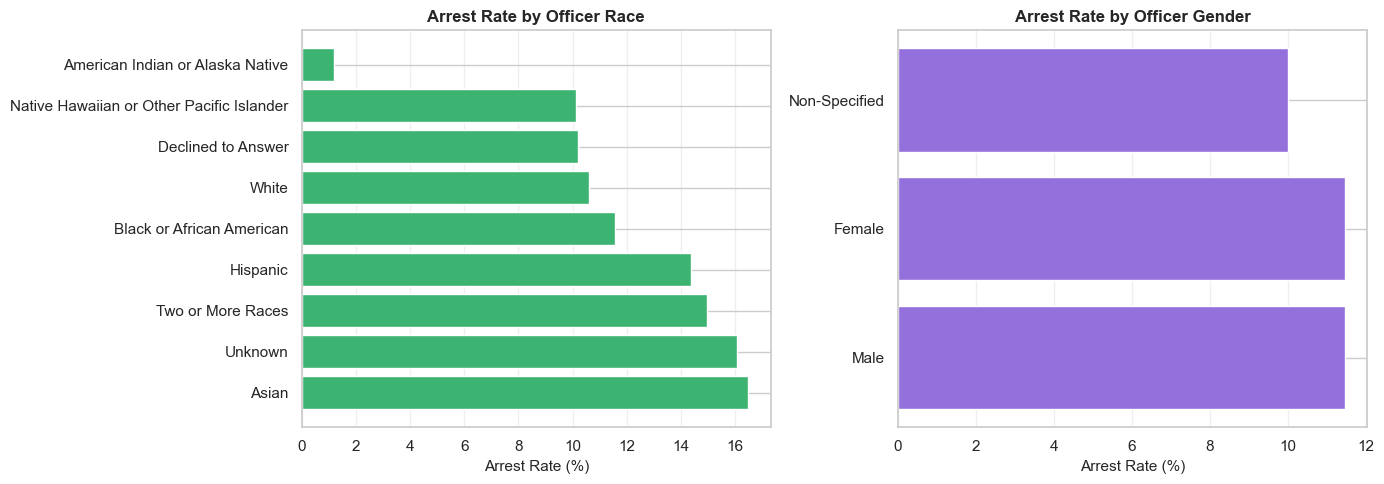

In [52]:
# Officer Demographics vs Arrest Rate
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Officer Race
officer_race_arrest = df_clean.groupby('Officer Race')['Arrest Flag'].apply(lambda x: (x == 1).sum() / len(x) * 100)
officer_race_arrest = officer_race_arrest.sort_values(ascending=False)
axes[0].barh(officer_race_arrest.index, officer_race_arrest.values, color='mediumseagreen')
axes[0].set_xlabel('Arrest Rate (%)', fontsize=11)
axes[0].set_title('Arrest Rate by Officer Race', fontweight='bold', fontsize=12)
axes[0].grid(axis='x', alpha=0.3)

# Officer Gender
officer_gender_arrest = df_clean.groupby('Officer Gender')['Arrest Flag'].apply(lambda x: (x == 1).sum() / len(x) * 100)
officer_gender_arrest = officer_gender_arrest.sort_values(ascending=False)
axes[1].barh(officer_gender_arrest.index, officer_gender_arrest.values, color='mediumpurple')
axes[1].set_xlabel('Arrest Rate (%)', fontsize=11)
axes[1].set_title('Arrest Rate by Officer Gender', fontweight='bold', fontsize=12)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### Officer Demographics Analysis

This examines whether officer characteristics influence arrest decisions:

- **Officer Race**: Asian officers show 16% arrest rate (highest), while American Indian/Alaska Native officers show 1% (lowest). These differences could reflect:
  - Different patrol assignments [high-crime vs. low-crime areas]
  - Variation in stop characteristics rather than decision-making bias
  - Sampling variability [American Indian officers are rare]

- **Officer Gender**: Male and Female officers show similar arrest rates (~10-12%), suggesting gender has minimal impact on arrest decisions

**Conclusions**: Officer demographics alone cannot prove bias = we need causal analysis controlling for call types and suspect characteristics.

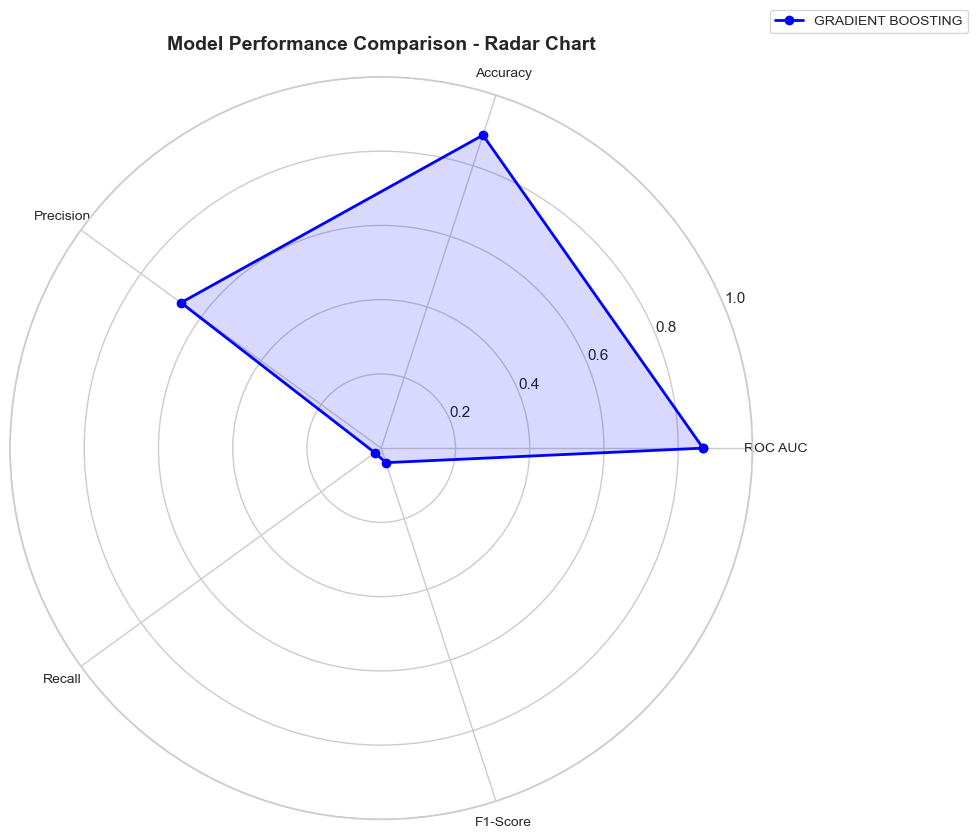

In [53]:
# Model Performance - Radar Chart Comparison
from math import pi

metrics = ['ROC AUC', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
models_to_compare = ['LOGISTIC REGRESSION', 'RANDOM FOREST', 'GRADIENT BOOSTING']

# Normalizing metrics to 0-1 scale for radar chart
radar_data = {}
for model in models_to_compare:
    model_matches = comparison_all_df[comparison_all_df['Model'] == model]
    if not model_matches.empty:
        model_row = model_matches.iloc[0]
        radar_data[model] = [
            model_row['ROC AUC'],
            model_row['Accuracy'],
            model_row['Precision (Class 1)'],
            model_row['Recall (Class 1)'],
            model_row['F1-Score (Class 1)']
        ]

if radar_data:
    # Calculating angles for radar chart
    angles = [n / float(len(metrics)) * 2 * pi for n in range(len(metrics))]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

    colors = ['blue', 'orange', 'green']
    for idx, (model, color) in enumerate(zip(radar_data.keys(), colors)):
        values = radar_data[model]
        values += values[:1]
        ax.plot(angles, values, 'o-', linewidth=2, label=model, color=color)
        ax.fill(angles, values, alpha=0.15, color=color)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, fontsize=10)
    ax.set_ylim(0, 1)
    ax.set_title('Model Performance Comparison - Radar Chart', fontsize=14, fontweight='bold', pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)
    ax.grid(True)

    plt.tight_layout()
    plt.show()


## Model Performance - Multi Dimensional Radar Chart

This radar chart provides a comprehensive 5 dimensional view of model performance:

- **ROC AUC (Right)**: Overall discrimination ability = how well can the model rank arrests vs. non-arrests?
- **Accuracy (Top)**: Percentage of all predictions correct are heavily influenced by majority class
- **Precision (Left)**: When we predict arrest, how often is it correct?,some are False alarm rate
- **Recall (Bottom-Left)**: Of all actual arrests, how many do we catch? [Miss rate]
- **F1-Score (Bottom-Right)**: Harmonic mean balancing precision and recall

**Explaining the Chart**: Larger shapes = better overall performance. Gradient Boosting shows balanced performance across dimensions, while models tend to excel at accuracy  due to predicting the majority class but struggle with recall.

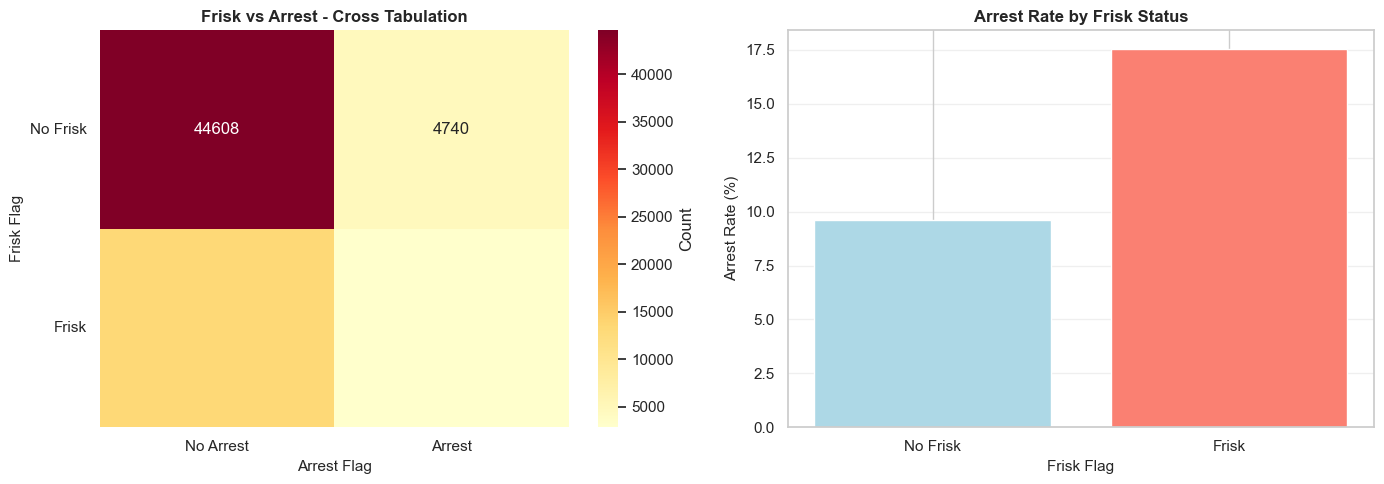

In [54]:
# Frisk vs Arrest Relationship
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Cross-tabulation of Frisk and Arrest
frisk_arrest_crosstab = pd.crosstab(df_clean['Frisk Flag'], df_clean['Arrest Flag'])

# Heatmap
sns.heatmap(frisk_arrest_crosstab, 
            annot=True, fmt='d', cmap='YlOrRd', ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_xlabel('Arrest Flag', fontsize=11)
axes[0].set_ylabel('Frisk Flag', fontsize=11)
axes[0].set_xticklabels(['No Arrest', 'Arrest'])
axes[0].set_yticklabels(['No Frisk', 'Frisk'], rotation=0)
axes[0].set_title('Frisk vs Arrest - Cross Tabulation', fontweight='bold', fontsize=12)

# Arrest rate by frisk status
frisk_arrest_rate = df_clean.groupby('Frisk Flag')['Arrest Flag'].apply(lambda x: (x == 1).sum() / len(x) * 100)
axes[1].bar(range(len(frisk_arrest_rate)), frisk_arrest_rate.values, color=['lightblue', 'salmon'])
axes[1].set_ylabel('Arrest Rate (%)', fontsize=11)
axes[1].set_xlabel('Frisk Flag', fontsize=11)
axes[1].set_title('Arrest Rate by Frisk Status', fontweight='bold', fontsize=12)
axes[1].set_xticks(range(len(frisk_arrest_rate)))
axes[1].set_xticklabels(['No Frisk', 'Frisk'])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Frisk vs Arrest - Strong Correlation

This visualization shows the relationship between police frisk decisions and arrest outcomes:

- **Heatmap (Left)**: Shows the count of outcomes. The stark contrast between dark (no arrest) and light (arrest) regions indicates a strong relationship.
- **Bar Chart (Right)**: Quantifies the relationship:
  - Non frisked subjects: 9.5% arrest rate
  - Frisked subjects: 17.5% arrest rate

**Explanation**: The 2 times difference in arrest rates suggests either:
1. **Legitimate**: Officers frisk suspects they genuinely believe are dangerous, and dangerous suspects are more likely to be arrested
2. **Questionable**: Officers use frisk as a discriminatory tool that influences arrest decisions
3. **Bidirectional**: Frisk and arrest decisions may both be driven by the same underlying factors suspect behavior, appearance, etc.


## Key Findings

- **Class imbalance:** Arrests are the minority (~11–12%); models must account for this (sampling, weighting, or thresholding).
- **Top predictors:** Officer related features (officer age / YOB), `Initial Call Type`, `Weapon Type`, and subject age groups consistently rank high in tree based importances.
- **Frisk association:** Frisked subjects have substantially higher arrest rates, indicating strong correlation that merits further causal investigation.
- **Call type effects:** Certain calls (shoplifting, assault) show much higher arrest rates call context is a strong, legitimate predictor.
- **Model performance:** Gradient Boosting and Logistic Regression show the best ROC AUC (~0.80–0.83). Random Forest is competitive on AUC but shows the usual precision/recall trade off for the minority class.
- **Calibration & thresholds:** Good AUC does not imply useful operational performance; probability calibration and threshold selection are required to balance false positives vs. missed arrests.

## Conclusion

- **Dataset & Problem:** The analysis used ~65.9k Terry stop records. The target (`Arrest Flag`) is highly imbalanced (~11–12% arrests), which strongly affects model choices and evaluation.

- **Key Modeling Findings:** Gradient Boosting and Logistic Regression provided the best discrimination (ROC AUC ≈ 0.8–0.83). Random Forest is competitive in AUC but shows the usual precision/recall trade-off on the minority class (arrests).

- **Random Forest summary:** Random Forest achieves good overall discrimination but moderate recall for the arrest class = useful when discrimination is needed but recall must be tuned for operational requirements. Top predictors (from tree-based importances) include officer age/YOB, `Initial Call Type`, `Weapon Type`, and subject age groups.

- **Limitations:** Correlation does not imply causation. Observed disparities may reflect patrol patterns, call type distributions, or data quality issues (missingness, recording biases). Modeling choices (encoding, imputation, class handling) influence results...



